# Churned Customer

In [2]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [13]:
df = pd.read_csv('file:///Users/kunto/Downloads/churn%20(2).csv')

print (df.shape)

(5000, 21)


In [14]:
df.head(8)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,3355,1,0,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,19,121,510,1516,0,1,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,24,147,415,116,1,0,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0


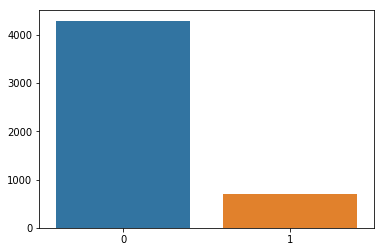

In [17]:
y = df["class"].value_counts()
#print (y)
sns.barplot(y.index, y.values)

In [20]:
y_True = df["class"][df["class"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["class"].shape[0]) * 100 ))

Churn Percentage = 14.14


In [21]:
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Churn By State

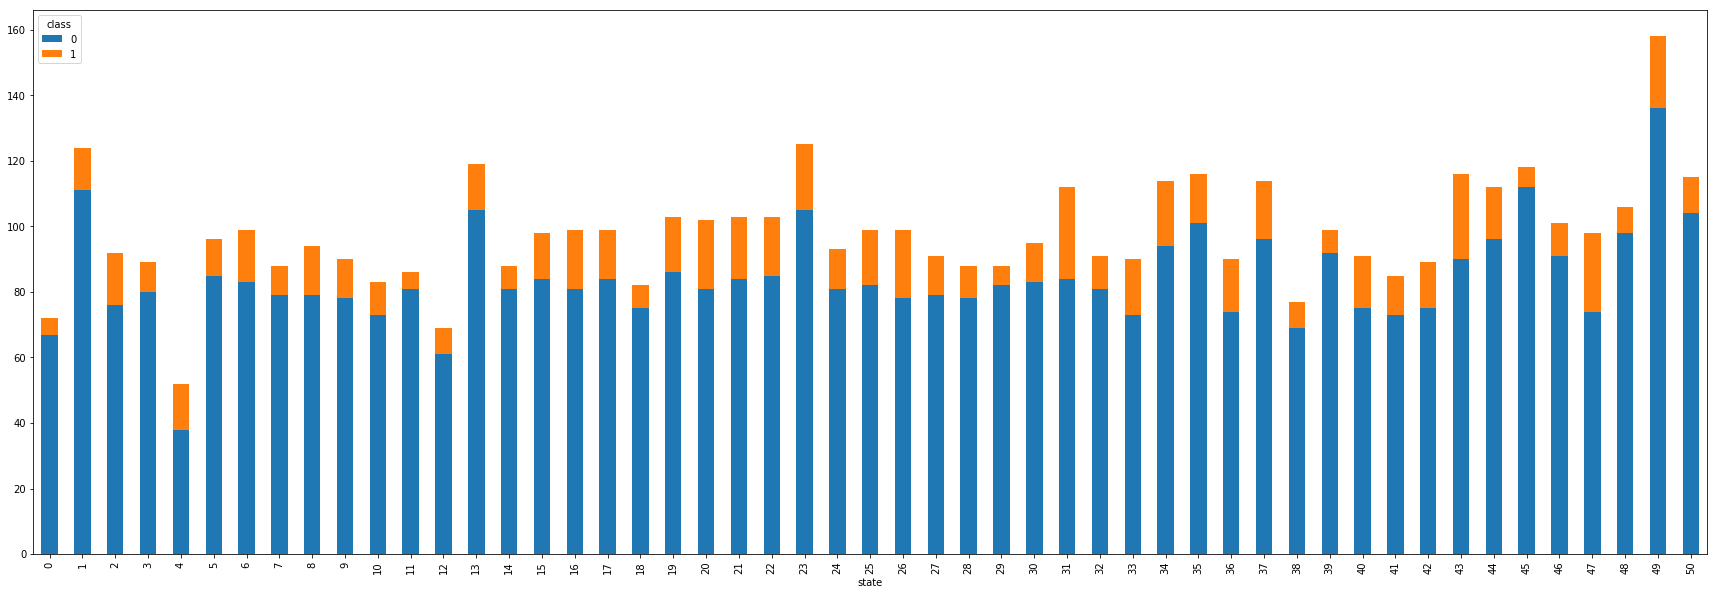

In [23]:
df.groupby(["state", "class"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

Churn By Area Code

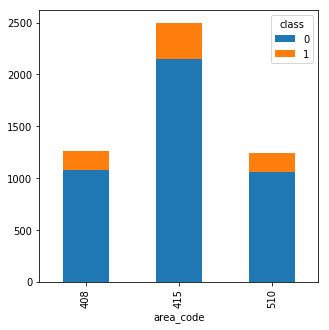

In [26]:
df.groupby(["area_code", "class"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

Churn By Customers with International plan

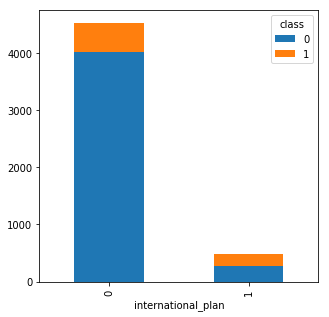

In [27]:
df.groupby(["international_plan", "class"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

Churn By Customers with Voice mail plan

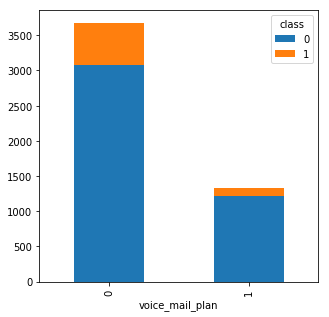

In [28]:
df.groupby(["voice_mail_plan", "class"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

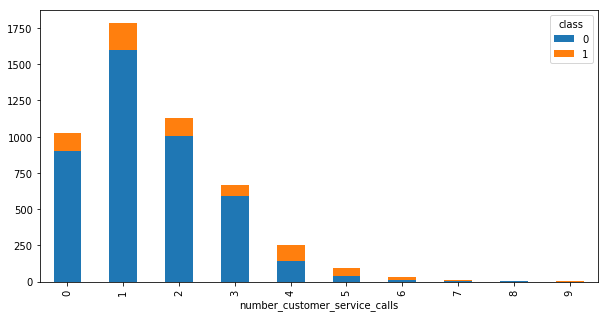

In [33]:
df.groupby(["number_customer_service_calls", "class"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))